In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import Dropout


def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# Loading dataset
exchange_data = pd.read_csv('EURUSD.csv')
exchange_data.head()

,Date,open,high,low,close,tick_volume,spread,real_volume
0,1980-01-02,1.1437,1.1457,1.1413,1.1437,881,50,0
1,1980-01-03,1.1420,1.1432,1.1411,1.1420,421,50,0
2,1980-01-04,1.1427,1.1431,1.1419,1.1424,211,50,0
3,1980-01-07,1.1453,1.1453,1.1452,1.1452,11,50,0
4,1980-01-08,1.1411,1.1416,1.1402,1.1408,251,50,0


In [16]:
# Changing format to datetime and indexing data
exchange_data["Date"] = pd.to_datetime(exchange_data["Date"])
ind_exchange_data = exchange_data.set_index(["Date"], drop=True)

ind_exchange_data.head()

,open,high,low,close,tick_volume,spread,real_volume
Date,,,,,,,
1980-01-02,1.1437,1.1457,1.1413,1.1437,881,50,0
1980-01-03,1.1420,1.1432,1.1411,1.1420,421,50,0
1980-01-04,1.1427,1.1431,1.1419,1.1424,211,50,0
1980-01-07,1.1453,1.1453,1.1452,1.1452,11,50,0
1980-01-08,1.1411,1.1416,1.1402,1.1408,251,50,0


In [17]:
# Sorting data in ascending order
data_frame = ind_exchange_data.sort_index(axis=1 ,ascending=True)
data_frame = data_frame.iloc[::-1]
data_frame.head()

,close,high,low,open,real_volume,spread,tick_volume
Date,,,,,,,
2023-01-10,1.07313,1.07587,1.07114,1.07260,114870300000,5,765802
2023-01-09,1.07268,1.07601,1.06370,1.06392,115589400000,5,770596
2023-01-06,1.06441,1.06475,1.04814,1.05188,115158600000,5,767724
2023-01-05,1.05206,1.06307,1.05145,1.06001,115689600000,5,771264
2023-01-04,1.06016,1.06347,1.05398,1.05449,117649950000,5,784333


<AxesSubplot:xlabel='Date'>

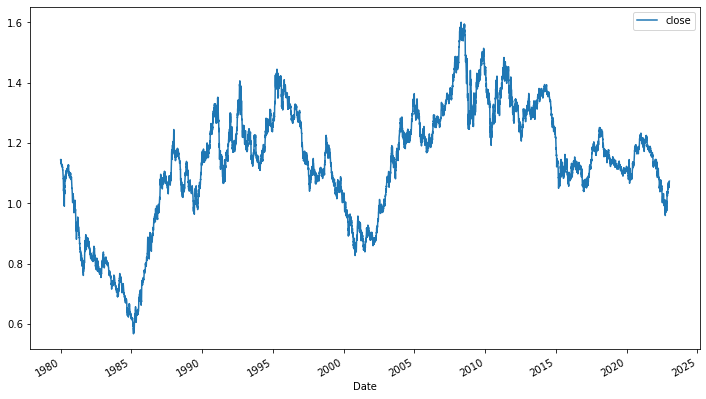

In [6]:
df = data_frame[["close"]]

df.plot(kind='line',figsize=(12,7))

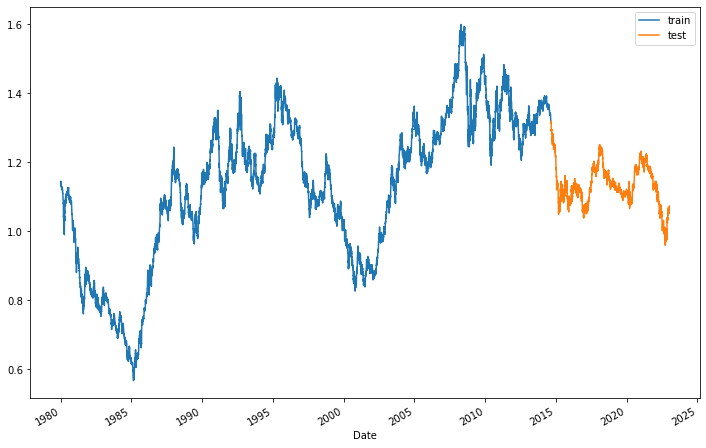

In [7]:
split_date = pd.Timestamp('26-08-2014')

train = df.loc[split_date:]
test = df.loc[:split_date]

ax = train.plot(kind='line',figsize=(12,8))
test.plot(ax=ax,kind='line',figsize=(12,8))
plt.legend(['train', 'test'])

In [8]:
sc = StandardScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

X_train

array([[0.8622387 ],
       [0.87389174],
       [0.89705854],
       ...,
       [0.06644288],
       [0.05344347],
       [0.05158641]])

In [9]:
K.clear_session()

model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(1))
model.summary()

2024-02-18 17:40:36.174691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 17:40:36.192349: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 17:40:36.192380: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 17:40:36.194412: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-18 17:40:36.194437: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/200


2024-02-18 17:41:11.377847: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-18 17:41:11.634968: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe3b1339690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 17:41:11.634992: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2024-02-18 17:41:11.645985: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 17:41:11.668618: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708274471.728080    5238 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8963/8963 [==============================] - 15s 2ms/step - loss: 0.0279 - rmse: 0.1669
Epoch 2/200
8963/8963 [==============================] - 15s 2ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 3/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 4/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 5/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 6/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0015 - rmse: 0.0394
Epoch 7/200
8963/8963 [==============================] - 17s 2ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 8/200
8963/8963 [==============================] - 17s 2ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 9/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 10/200
8963/8963 [==============================] - 16s 2ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 11/20

In [18]:
y_pred_test = model.predict(X_test)
y_train_pred = model.predict(X_train)

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(test_mse)

print("Train - R2:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("Train - MAE:\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred)))
print("Train - RMSE:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred)
print("Train - upravene R2:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))

print("Test - R2:\t{:0.3f}".format(r2_score(y_test, y_pred_test)))
r2_test = r2_score(y_test, y_pred_test)
print("Test - MAE:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Test - RMSE:\t{:0.3f}".format(rmse_test))
print("Test - upravene R2:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

281/281 [==============================] - 0s 1ms/step
Train - R2:	0.968
Train - MAE:	0.139
Train - RMSE:	0.179
Train - upravene R2:	0.968

Test - R2:	0.970
Test - MAE:	0.036
Test - RMSE:	0.048
Test - upravene R2:	0.970


In [1]:
plt.figure(figsize=(12,8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test, label='ANN')
plt.title("ANN's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [19]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [24]:
from keras.layers import LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', 
                    return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
8963/8963 [==============================] - 29s 3ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 2/100
8963/8963 [==============================] - 28s 3ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 3/100
8963/8963 [==============================] - 25s 3ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 4/100
8963/8963 [==============================] - 24s 3ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 5/100
8963/8963 [==============================] - 27s 3ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 6/100
8963/8963 [==============================] - 26s 3ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 7/100
8963/8963 [==============================] - 27s 3ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 8/100
8963/8963 [==============================] - 28s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9/100
8963/8963 [==============================] - 26s 3ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 10/100
8963/8963 [==============================] - 27s 3ms/step - loss: 0.0016 - rmse: 0.0397

In [1]:
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

train_mse = metrics.mean_squared_error(y_train, y_train_pred_lstm)
rmse_train = np.sqrt(train_mse)

test_mse = metrics.mean_squared_error(y_test, y_pred_test_lstm)
rmse_test = np.sqrt(test_mse)

print("Train - R2:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("Train - MAE\t{:0.3f}".format(metrics.mean_absolute_error(y_train, y_train_pred_lstm)))
print("Train - RMSE:\t{:0.3f}".format(rmse_train))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("Train - upravene R2:\t{:0.3f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))


print("Test - R2:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("Test - MAE:\t{:0.3f}".format(metrics.mean_absolute_error(y_test, y_pred_test_lstm)))
print("Test - RMSE:\t{:0.3f}".format(rmse_test))
print("Test - upravene R2:\t{:0.3f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

NameError: name 'model_lstm' is not defined

NameError: name 'plt' is not defined